# Gurobi Optimization MiniMax

In [1]:
import gurobipy as gp
from gurobipy import *
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
import warnings
import math
import pandas as pd
import random

warnings.filterwarnings("ignore") # To ignore warnings produced

In [2]:
zips_df = pd.read_csv('Zipcode.csv')
# zips_df
zips_df = zips_df.loc[(zips_df['COUNTYNAME'] == 'ALLEGHENY') & (zips_df['population'] > 0)]
zips_df


,OBJECTID,ZIP,NAME,ZIPTYPE,STATE,STATEFIPS,COUNTYFIPS,COUNTYNAME,S3DZIP,LAT,...,MFDU,SFDU,BOXCNT,BIZCNT,RELVER,COLOR,GlobalID,SHAPESTArea,SHAPESTLength,population
0,4,15057,BAKERSTOWN,NON-UNIQUE,PA,42.0,42003.0,ALLEGHENY,150.0,40.361610,...,0.0,107.0,66.0,55.0,1.9.3,10.0,{4768B869-6BC2-4B77-8DC7-A3BB678888D1},1.337121e+07,20129.308120,6738
1,4,15206,BAKERSTOWN,NON-UNIQUE,PA,42.0,42003.0,ALLEGHENY,150.0,40.467710,...,0.0,107.0,66.0,55.0,1.9.3,10.0,{4768B869-6BC2-4B77-8DC7-A3BB678888D1},1.337121e+07,20129.308120,22090
2,4,15214,BAKERSTOWN,NON-UNIQUE,PA,42.0,42003.0,ALLEGHENY,150.0,40.483220,...,0.0,107.0,66.0,55.0,1.9.3,10.0,{4768B869-6BC2-4B77-8DC7-A3BB678888D1},1.337121e+07,20129.308120,12010
3,4,15229,BAKERSTOWN,NON-UNIQUE,PA,42.0,42003.0,ALLEGHENY,150.0,40.517330,...,0.0,107.0,66.0,55.0,1.9.3,10.0,{4768B869-6BC2-4B77-8DC7-A3BB678888D1},1.337121e+07,20129.308120,13410
4,4,15228,BAKERSTOWN,NON-UNIQUE,PA,42.0,42003.0,ALLEGHENY,150.0,40.368810,...,0.0,107.0,66.0,55.0,1.9.3,10.0,{4768B869-6BC2-4B77-8DC7-A3BB678888D1},1.337121e+07,20129.308120,17180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,65824,15047,GREENOCK,PO BOX,PA,42.0,42003.0,ALLEGHENY,150.0,40.609477,...,0.0,1.0,162.0,16.0,1.9.3,15.0,{D0843174-66EC-4E75-82B3-87CF445999DA},7.581705e+06,16838.182670,378
122,65828,15032,CURTISVILLE,PO BOX,PA,42.0,42003.0,ALLEGHENY,150.0,40.382820,...,346.0,4134.0,58.0,472.0,1.9.3,6.0,{DB50227E-70F4-42B6-8520-7459A48CA185},8.121033e+02,124.463622,244
124,65837,15221,PITTSBURGH,NON-UNIQUE,PA,42.0,42003.0,ALLEGHENY,152.0,40.467750,...,3486.0,12256.0,298.0,826.0,1.9.3,11.0,{FD9F8061-8A24-42E9-B338-E4E0AD2E4902},1.661810e+08,94732.735410,23860
125,65839,15205,PITTSBURGH,NON-UNIQUE,PA,42.0,42003.0,ALLEGHENY,152.0,40.483220,...,1718.0,8997.0,116.0,1222.0,1.9.3,11.0,{0DA8A3EB-2BBC-4D9A-B932-9C9C9BF5E3E3},3.850844e+08,236307.108000,20320


In [3]:
zips = zips_df['ZIP'].to_list()
# zips
all_n = np.array(zips)
# # zips
# np.in1d(POD_zips, all_n)
# 0,1,5,9,10,13,15,16,21,22,24,27,29,36
# POD_zips[[0,1,5,9,10,13,15,16,21,22,24,27,29,36]]

In [4]:
zipcodes_path = 'pittsburgh-allegheny-county.csv'
data = np.genfromtxt(zipcodes_path, dtype=str, delimiter=',', encoding='utf-8-sig')
# neighborhoods = data.astype(np.int)
neighborhoods = all_n.astype(np.int)

POD_sites_path = 'POD Sites.xlsx'
POD_df = pd.read_excel(POD_sites_path)
POD_df = POD_df[['SCHOOL/FACILITY NAME', 'STRIP MAP']]
POD_df['ZIPCODE'] = POD_df['STRIP MAP'].apply(lambda x: str(x)[-5:])
POD_df = POD_df[:47]
POD_df

POD_zips = np.array(pd.to_numeric(POD_df.ZIPCODE).values)
print(POD_zips)
print(neighborhoods)

[15237 15236 15102 15216 15227 15106 15210 15220 15025 15108 15024 15110
 15137 15037 15238 15146 15101 15065 15216 15132 15136 15108 15228 15090
 15229 15202 15235 15214 15044 15206 15217 15239 15056 15139 15209 15133
 15057 15129 15144 15120 15136 15025 15241 15126 15122 15221 15221]
[15057 15206 15214 15229 15228 15108 15101 15146 15037 15024 15108 15106
 15236 15237 15007 15014 15015 15018 15025 15034 15030 15035 15046 15049
 15064 15065 15082 15110 15112 15129 15131 15132 15133 15135 15137 15144
 15148 15203 15211 15213 15224 15225 15232 15239 15275 15006 15051 15223
 15227 16229 15282 15083 15088 15116 15122 15204 15216 15102 15234 15120
 15017 15215 15139 15028 15145 15104 15086 15142 15241 15226 15207 15075
 15076 15209 15243 15136 16046 15056 15045 15090 15084 15147 15235 15238
 15220 15217 15233 15143 15210 15289 15044 15126 15047 15032 15221 15205
 15202]


In [5]:
num_neighborhoods = len(neighborhoods)
num_sites = len(POD_zips)


random.seed(20)

zipcodes_df = pd.read_csv('Zipcode.csv')
# zipcodes_df = zipcodes_df.loc[zipcodes_df['type'].isin(['STANDARD', 'UNIQUE'])]
zipcodes_df = zipcodes_df.loc[(zipcodes_df['population'] > 0)]
zipcodes_df_filtered = zipcodes_df[['ZIP', 'NAME', 'LAT', 'LON', 'population']]


from math import sin, cos, sqrt, atan2, radians

def calcDistBetweenTwoPoints(pt1, pt2):
    # approximate radius of earth in km
    R = 6373.0
    lat1 = radians(pt1[0])
    lon1 = radians(pt1[1])
    lat2 = radians(pt2[0])
    lon2 = radians(pt2[1])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return(distance)
    
def getLatLongFromZip_graph(zipcode, df):
    lat = df.loc[df['ZIP'] == zipcode]['LAT'].values[0]
    long = df.loc[df['ZIP'] == zipcode]['LON'].values[0]
    return((lat, long))

def getLatLongFromZip(zipcode, df):
    lat = df.loc[df['ZIP'] == zipcode]['LAT'].values[0]
    long = df.loc[df['ZIP'] == zipcode]['LON'].values[0]
    return((lat, long))
    
problematic_n = []
problematic_s = []
distances = []
# nomi.query_postal_code()['latitude']
for i in range(num_neighborhoods):
    temp = []
    for j in range(num_sites):
        try:
#             print(POD_zips[j])
            pt1 = getLatLongFromZip(neighborhoods[i], zips_df)
#             pt1 = (nomi.query_postal_code(str(neighborhoods[i]))['latitude'], nomi.query_postal_code(str(neighborhoods[i]))['longitude'])
#             print(pt1)
            pt2 = getLatLongFromZip(POD_zips[j], zips_df)
#             pt2 = (nomi.query_postal_code(str(POD_zips[j]))['latitude'], nomi.query_postal_code(str(POD_zips[j]))['longitude'])
            dist = calcDistBetweenTwoPoints(pt1, pt2)
            temp.append(dist)
        except:
            problematic_n.append(neighborhoods[i])
            problematic_s.append(POD_zips[j])
#             print(neighborhoods[i], POD_zips[j])
            print('-'*50)
            temp.append(1000000)
    distances.append(temp)
distances = np.array(distances)
# distances = np.delete(distances, (12), axis=0)

Text(0.5, 1.0, 'Neighborhoods (blue) vs possible POD sites (red)')

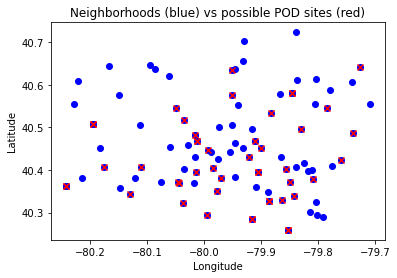

In [6]:
POD_lats = []
POD_longs = []

for z in POD_zips:
    lat, long = getLatLongFromZip_graph(z, zips_df)
    POD_lats.append(lat)
    POD_longs.append(long)
    
neighborhood_lats = []
neighborhood_longs = []

for z in neighborhoods:
    lat, long = getLatLongFromZip_graph(z, zips_df)
    neighborhood_lats.append(lat)
    neighborhood_longs.append(long)

    
plt.scatter(neighborhood_longs, neighborhood_lats, marker='o', c = 'blue')
plt.scatter(POD_longs, POD_lats, marker='x', c = 'red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Neighborhoods (blue) vs possible POD sites (red)')




In [7]:
population = []
for i in range(num_neighborhoods):
    try:
        population.append(zipcodes_df_filtered.loc[zipcodes_df_filtered['ZIP'] == neighborhoods[i]]['population'].values[0])
    except:
        pass

population = np.array(population)
pop_mean = np.mean(population)

#for i in range(len(population)):
#    if(population[i] == 0):
#        population[i] = pop_mean
print(population)

[ 6738 22090 12010 13410 17180 37850 24110 25680  9730  7970 37850 16810
 29410 42230   360  2650  1290   750 15150  1350   850  1770  2360   860
   310  9890   386  3950  2650 10260  7280 14700  5460  4510  8540  3580
  1860  6410  8560  7230  7630   870  6760 20120    13   359   360  6180
 26790  4790    16   900   631 13950 17260  6820 19990 28950 12670 15350
 14880 11150  6080   170  5720  6020   560  1860 22040 11930  8780   207
   810 10970 13340 20030 18170   950  3500 23900  8360 13980 30560 12850
 16460 21290  2120 21220 20140   123 29140  6730   378   244 23860 20320
 17220]


In [48]:
population.shape

(97,)

## Find the min max distance possible

In [9]:
# MODEL INITIALIZATION
m1 = Model()
sizes = range(3)
zipcodes = range(distances.shape[0])
sites = range(distances.shape[1])
days = range(25)

# CONSTANTS
D = distances
p = population
total_pop = population.sum()
e = np.array([72, 85, 100])
o = 20000
v = 50
f = 8000
r = 206.76
h = 12.5
C = 1370

# DECISION VARIABLES
A = m1.addVars(zipcodes, sites, vtype = GRB.BINARY)
S = m1.addVars(sites, vtype = GRB.BINARY)
M = m1.addVars(sites, vtype = GRB.BINARY)
L = m1.addVars(sites, vtype = GRB.BINARY)
U = m1.addVars(sites, days, vtype = GRB.BINARY)
X = m1.addVars(sites, days)#, vtype = GRB.INTEGER)
I = m1.addVars(sites, days)#, vtype = GRB.INTEGER)

# OBJECTIVE

MAX = m1.addVar(lb = 0.0)
m1.setObjective(MAX)
m1.modelSense = GRB.MINIMIZE

# CONSTRAINTS
for i in zipcodes:
    m1.addConstr(sum(A[i,j] for j in sites) == 1)
    
    for j in sites:
        m1.addConstr(MAX >= D[i,j]*A[i,j])
        m1.addConstr(A[i,j] <= S[j] + M[j] + L[j])
        m1.addConstr(A[i,j] >= 0)
        
for j in sites:
    assigned_pop = sum(A[i,j] * p[i] for i in zipcodes)
    m1.addConstr(S[j] + M[j] + L[j] <= 1)
    m1.addConstr(sum(e[0]*X[j,t] for t in days) >= assigned_pop - (1-S[j])*total_pop)
    m1.addConstr(sum(e[1]*X[j,t] for t in days) >= assigned_pop - (1-M[j])*total_pop)
    m1.addConstr(sum(e[2]*X[j,t] for t in days) >= assigned_pop)
    m1.addConstr(S[j] >= 0)
    m1.addConstr(M[j] >= 0)
    m1.addConstr(L[j] >= 0)
    
    administered = [0,0,0]
    for t in days:
        administered[0] += e[0]*X[j,t]
        administered[1] += e[1]*X[j,t]
        administered[2] += e[2]*X[j,t]
        m1.addConstr(X[j,t] >= 10*M[j] + 20*L[j] - 20*(1-U[j,t]))
        m1.addConstr(X[j,t] <= 10*S[j] + 20*M[j] + C*L[j]) #The third term is redundant
        m1.addConstr(X[j,t] <= C*U[j,t])
        m1.addConstr(U[j,t] <= S[j] + M[j] + L[j])
        m1.addConstr(I[j,t] + (1-S[j])*total_pop >= assigned_pop - administered[0])
        m1.addConstr(I[j,t] + (1-M[j])*total_pop >= assigned_pop - administered[1])
        m1.addConstr(I[j,t] + (1-L[j])*total_pop >= assigned_pop - administered[2])
        m1.addConstr(X[j,t] >= 0)
        m1.addConstr(I[j,t] >= 0)
        m1.addConstr(U[j,t] >= 0)   
        
for t in days:
    m1.addConstr(sum(X[j,t] for j in sites) <= C)


Academic license - for non-commercial use only - expires 2022-08-29
Using license file C:\Users\Ben\gurobi.lic


In [10]:
#m1.Params.MIPGap = 0.1
m1.Params.TimeLimit = 20*60
m1.optimize()

Changed value of parameter TimeLimit to 1200.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 25878 rows, 8226 columns and 469941 nonzeros
Model fingerprint: 0x5ebb2a7c
Variable types: 2351 continuous, 5875 integer (5875 binary)
Coefficient statistics:
  Matrix range     [2e-01, 1e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+06]
Presolve removed 11902 rows and 1175 columns
Presolve time: 0.28s
Presolved: 13976 rows, 7051 columns, 66716 nonzeros
Variable types: 1176 continuous, 5875 integer (5875 binary)
Found heuristic solution: objective 47.6903713
Found heuristic solution: objective 42.6720166
Found heuristic solution: objective 35.9605456
Found heuristic solution: objective 32.0191374

Root relaxation: objective 2.849850e+00, 1695 iterations, 0.11 seconds

    Nodes    |   

In [11]:
m1.objval

14.657912157781494

The minimum max distance possible is 14.66

In [12]:
num_sites = 0
for j in sites:
    if (S[j].x + M[j].x + L[j].x) > 0:
        num_sites += 1
print(num_sites)

46


## Minimizing distance while keeping cost at a minimum

In [13]:
distances.max(0).min()

30.520364383667598

In [14]:
np.argmin(distances.max(0))

29

Use only one site, site 29

## Minimizing Cost while holding max distance at minimum

In [15]:
m1.addConstr(MAX <= m1.objval)
m1.setObjective(o*sum((S[j] + M[j] + L[j]) for j in sites)
                + v*sum(A[i,j]*p[i] for i in zipcodes for j in sites)
                + sum(r*X[j,t] + h*I[j,t] + f*U[j,t] for j in sites for t in days))
#m1.Params.MIPGap = 0.1
m1.Params.TimeLimit = 40*60
m1.optimize()
m1.objval

Changed value of parameter TimeLimit to 1800.0
   Prev: 1200.0  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 25879 rows, 8226 columns and 469942 nonzeros
Model fingerprint: 0x31a8891f
Variable types: 2351 continuous, 5875 integer (5875 binary)
Coefficient statistics:
  Matrix range     [2e-01, 1e+06]
  Objective range  [1e+01, 2e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+06]

MIP start from previous solve produced solution with objective 1.59435e+08 (0.12s)
Loaded MIP start from previous solve with objective 1.59435e+08

Presolve removed 16014 rows and 3081 columns
Presolve time: 0.58s
Presolved: 9865 rows, 5145 columns, 190018 nonzeros
Variable types: 2335 continuous, 2810 integer (2810 binary)

Root relaxation: objective 5.446161e+07, 11334 iterations, 1.04 seconds

    Nodes    |    Current Node    |     Objective Bo

    37    45 5.4480e+07    8  497 9.7763e+07 5.4476e+07  44.3%   657   25s
   231   239 5.4535e+07   41  180 9.7763e+07 5.4476e+07  44.3%   305   30s
   499   459 7.0279e+07   73   58 9.7763e+07 5.4476e+07  44.3%   242   35s
  1042  1075 8.1420e+07  129  120 9.7763e+07 5.4476e+07  44.3%   184   40s
  1824  1695 5.4479e+07    7  350 9.7763e+07 5.4478e+07  44.3%   142   45s
  2289  2137 5.4491e+07   16  332 9.7763e+07 5.4478e+07  44.3%   135   53s
  2453  2361 5.4495e+07   19  291 9.7763e+07 5.4478e+07  44.3%   135   55s
H 2824  2571                    9.776036e+07 5.4478e+07  44.3%   131   57s
  2845  2572 8.8878e+07  245  524 9.7760e+07 5.4478e+07  44.3%   133   72s
  2848  2574 6.3393e+07   45  341 9.7760e+07 5.4478e+07  44.3%   133   75s
  2859  2581 5.4484e+07   14  556 9.7760e+07 5.4482e+07  44.3%   132   80s
  2866  2586 8.7709e+07  173  472 9.7760e+07 5.4493e+07  44.3%   132   85s
  2879  2595 8.5231e+07  142  423 9.7760e+07 5.4501e+07  44.3%   131   90s
  2894  2605 8.0949e+07  

  5602  4330 6.5029e+07  184  130 9.7758e+07 5.4553e+07  44.2%   314  642s
  5901  4273 6.8625e+07  222  217 9.7758e+07 5.4553e+07  44.2%   308  676s
  6331  4614 7.3472e+07  274  223 9.7758e+07 5.4553e+07  44.2%   300  684s
  6428  5117 7.9201e+07  314  150 9.7758e+07 5.4553e+07  44.2%   301  687s
  6965  5479 8.8085e+07  370  203 9.7758e+07 5.4553e+07  44.2%   288  690s
  7569  5691 9.2562e+07  436  103 9.7758e+07 5.4553e+07  44.2%   270  697s
  8012  5896 5.4576e+07   37  505 9.7758e+07 5.4553e+07  44.2%   264  701s
  8367  5962 5.4576e+07   39  427 9.7758e+07 5.4553e+07  44.2%   260  708s
  8647  5992 5.4570e+07   38  428 9.7758e+07 5.4553e+07  44.2%   255  712s
  8795  6148 5.4576e+07   38  462 9.7758e+07 5.4554e+07  44.2%   255  717s
  9000  6297 5.4554e+07   37  592 9.7758e+07 5.4554e+07  44.2%   254  722s
  9217  6455 5.4557e+07   38  521 9.7758e+07 5.4554e+07  44.2%   254  727s
  9452  6447 5.5991e+07   39  643 9.7758e+07 5.4554e+07  44.2%   253  734s
  9628  6441 5.4555e+07  

 26081 21149 6.3006e+07  147  636 9.7758e+07 5.4625e+07  44.1%   271 1525s
 26086 21153 5.7618e+07  113  604 9.7758e+07 5.4625e+07  44.1%   271 1530s
 26091 21156 9.5649e+07  160  585 9.7758e+07 5.4625e+07  44.1%   271 1535s
 26097 21160 5.9770e+07  118  655 9.7758e+07 5.4626e+07  44.1%   271 1540s
 26106 21166 5.5342e+07  102  508 9.7758e+07 5.4626e+07  44.1%   271 1545s
 26111 21169 6.1644e+07  126  517 9.7758e+07 5.4627e+07  44.1%   271 1550s
 26119 21175 7.8746e+07  220  541 9.7758e+07 5.4627e+07  44.1%   271 1556s
 26125 21179 8.5460e+07  134  542 9.7758e+07 5.4627e+07  44.1%   271 1561s
 26130 21182 5.9483e+07  124  526 9.7758e+07 5.4628e+07  44.1%   271 1565s
 26134 21185 5.6055e+07   86  466 9.7758e+07 5.4628e+07  44.1%   271 1570s
 26142 21190 8.2033e+07  183  509 9.7758e+07 5.4629e+07  44.1%   271 1576s
 26151 21196 6.5049e+07  186  439 9.7758e+07 5.4630e+07  44.1%   270 1582s
 26162 21203 5.7379e+07  127  607 9.7758e+07 5.4630e+07  44.1%   270 1585s
 26174 21211 9.3908e+07  

97758033.338

In [16]:
print("The minimum max distance is found using a budget of", m1.objval)

The minimum max distance is found using a budget of 97758033.338


The minimum max distance is found using a budget of $98,677,864.35

In [34]:
num_sites = 0
utilized = []
for j in sites:
    if (S[j].x + M[j].x + L[j].x) > 0:
        num_sites += 1
        utilized.append(j)
print(num_sites)

6


In [33]:
for j in sites:
    print("Site:", j+1, '\t', L[j].x, '\t', S[j].x + M[j].x + L[j].x)

Site: 1 	 1.0 	 1.0
Site: 2 	 -0.0 	 -0.0
Site: 3 	 1.0 	 1.0
Site: 4 	 -0.0 	 -0.0
Site: 5 	 -0.0 	 -0.0
Site: 6 	 -0.0 	 -0.0
Site: 7 	 -0.0 	 -0.0
Site: 8 	 -0.0 	 -0.0
Site: 9 	 -0.0 	 -0.0
Site: 10 	 1.0 	 1.0
Site: 11 	 -0.0 	 -0.0
Site: 12 	 -0.0 	 -0.0
Site: 13 	 -0.0 	 -0.0
Site: 14 	 -0.0 	 -0.0
Site: 15 	 1.0 	 1.0
Site: 16 	 -0.0 	 -0.0
Site: 17 	 -0.0 	 -0.0
Site: 18 	 -0.0 	 -0.0
Site: 19 	 -0.0 	 -0.0
Site: 20 	 -0.0 	 -0.0
Site: 21 	 -0.0 	 -0.0
Site: 22 	 -0.0 	 -0.0
Site: 23 	 0.0 	 0.0
Site: 24 	 -0.0 	 -0.0
Site: 25 	 0.0 	 0.0
Site: 26 	 -0.0 	 -0.0
Site: 27 	 -0.0 	 -0.0
Site: 28 	 -0.0 	 -0.0
Site: 29 	 -0.0 	 -0.0
Site: 30 	 -0.0 	 -0.0
Site: 31 	 -0.0 	 -0.0
Site: 32 	 0.0 	 0.0
Site: 33 	 0.0 	 0.0
Site: 34 	 -0.0 	 -0.0
Site: 35 	 -0.0 	 -0.0
Site: 36 	 -0.0 	 -0.0
Site: 37 	 -0.0 	 -0.0
Site: 38 	 -0.0 	 -0.0
Site: 39 	 1.0 	 1.0
Site: 40 	 -0.0 	 -0.0
Site: 41 	 1.0 	 1.0
Site: 42 	 -0.0 	 -0.0
Site: 43 	 -0.0 	 -0.0
Site: 44 	 -0.0 	 -0.0
Site: 45 	 -0.0 	

In [19]:
max_ts = []
for j in sites:
    max_t = 0
    for t in days:
        if np.allclose(I[j,t].x,0):
            max_t = t + 1
            max_ts.append(max_t)
            break
            

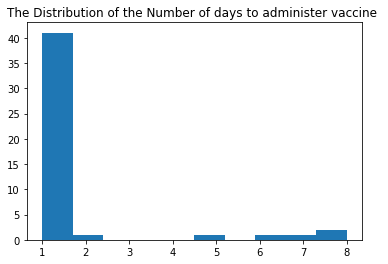

In [20]:
plt.hist(max_ts)
plt.title("The Distribution of the Number of days to administer vaccine ")
plt.show()

In [21]:
days_not_serving = []
days_serving = []
for j in sites:
    num_days = 0
    serve = 0
    for t in days:
        if np.allclose(X[j,t].x, 0) and np.allclose(I[j,t].x, 0) is False:
            num_days += 1
        if np.allclose(X[j,t].x, 0) is False:
            serve +=1 
    days_not_serving.append(num_days)
    days_serving.append(serve)
    

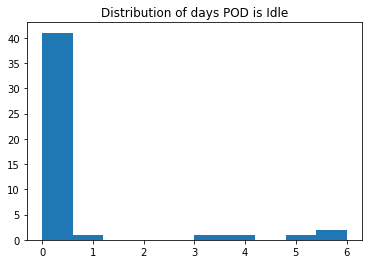

In [22]:
plt.hist(days_not_serving)
plt.title("Distribution of days POD is Idle")
plt.show()

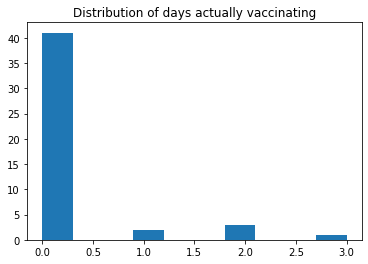

In [23]:
plt.hist(days_serving)
plt.title("Distribution of days actually vaccinating")
plt.show()

In [45]:
utilized = []
for j in sites:
    if (S[j].x + M[j].x + L[j].x) > 0:
        utilized.append(j)

6


Text(0.5, 1.0, 'Neighborhoods (blue) vs optimal POD sites (red)')

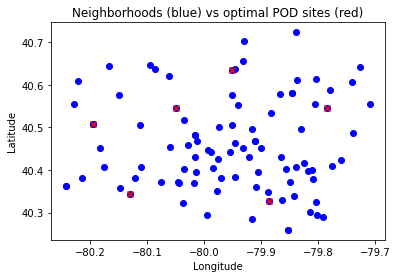

In [47]:
print(num_sites)
plt.scatter(neighborhood_longs, neighborhood_lats, marker='o', c = 'blue')
plt.scatter(np.take(POD_longs, utilized), np.take(POD_lats, utilized), marker='x', c = 'red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Neighborhoods (blue) vs optimal POD sites (red)')

In [25]:
vaccinations = []
cum_vaccinations = []
cum_vaccinated = 0
for t in days:
    vaccinated = sum(X[j,t].x*(e[0]*S[j].x + e[1]*M[j].x + e[2]*L[j].x) for j in sites)
    cum_vaccinated += vaccinated
    vaccinations.append(vaccinated)
    cum_vaccinations.append(cum_vaccinated)

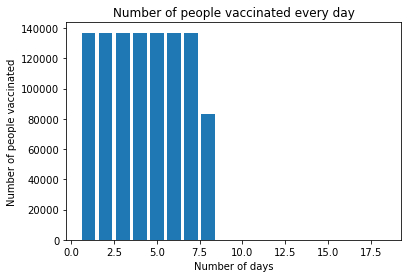

In [26]:
timeline = np.arange(100)+1
plt.bar(timeline[:18], vaccinations[:18])
plt.ylabel("Number of people vaccinated")
plt.xlabel("Number of days")
plt.title("Number of people vaccinated every day")
plt.show()

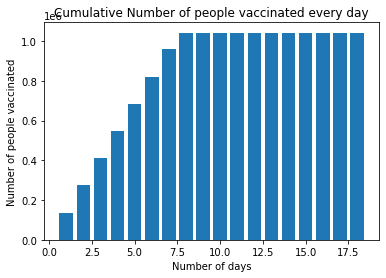

In [27]:
timeline = np.arange(100)+1
plt.bar(timeline[:18], cum_vaccinations[:18])
plt.ylabel("Number of people vaccinated")
plt.xlabel("Number of days")
plt.title("Cumulative Number of people vaccinated every day")
plt.show()

In [28]:
vaccinations

[137000.0,
 137000.0,
 137000.0,
 137000.0,
 137000.0,
 136997.0,
 136997.0,
 83511.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [29]:
for j in sites:
    print("Site:", j+1, '\t', sum(A[i,j].x*p[i] for i in zipcodes))

Site: 1 	 147790.0
Site: 2 	 0.0
Site: 3 	 166318.0
Site: 4 	 0.0
Site: 5 	 0.0
Site: 6 	 0.0
Site: 7 	 0.0
Site: 8 	 0.0
Site: 9 	 0.0
Site: 10 	 136997.0
Site: 11 	 0.0
Site: 12 	 0.0
Site: 13 	 0.0
Site: 14 	 0.0
Site: 15 	 90633.0
Site: 16 	 0.0
Site: 17 	 0.0
Site: 18 	 0.0
Site: 19 	 0.0
Site: 20 	 0.0
Site: 21 	 0.0
Site: 22 	 0.0
Site: 23 	 0.0
Site: 24 	 0.0
Site: 25 	 0.0
Site: 26 	 0.0
Site: 27 	 0.0
Site: 28 	 0.0
Site: 29 	 0.0
Site: 30 	 0.0
Site: 31 	 0.0
Site: 32 	 0.0
Site: 33 	 0.0
Site: 34 	 0.0
Site: 35 	 0.0
Site: 36 	 0.0
Site: 37 	 0.0
Site: 38 	 0.0
Site: 39 	 191193.0
Site: 40 	 0.0
Site: 41 	 309574.0
Site: 42 	 0.0
Site: 43 	 0.0
Site: 44 	 0.0
Site: 45 	 0.0
Site: 46 	 0.0
Site: 47 	 0.0


In [30]:
j = 32
for t in days:
    print(I[j,t].x, '\t', '\t', X[j,t].x)

0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0


In [50]:
# Writing to a csv file

with open('Aij_Ben_max_distance.csv', 'w') as f:
    for i in zipcodes:
        for j in sites:
            f.write(str(A[i,j].x) + ',')
        f.write('\n')
print('Done')

with open('Dij_Ben_max_distance.csv', 'w') as f:
    for i in zipcodes:
        for j in sites:
            f.write(str(D[i,j]) + ',')
        f.write('\n')
print('Done')

Done
Done
